In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('anomaly-data-1',header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
subdata = data[data[2] == 'http']

# Data Preprocessing

In [5]:
subdata[41].value_counts()

normal.       61886
back.          2203
neptune.        192
phf.              4
ipsweep.          3
portsweep.        3
satan.            2
Name: 41, dtype: int64

In [6]:
normals = subdata[subdata[41] == "normal."]
non_normal = subdata[subdata[41] != "normal."]

outlier_fraction = len(non_normal) / float(len(subdata))
print("Outlier Fraction: %",round(outlier_fraction*100,2))

print('Non-normal Cases: {}'.format(len(non_normal)))
print('Normal Cases: {}'.format(len(normals)))

Outlier Fraction: % 3.74
Non-normal Cases: 2407
Normal Cases: 61886


In [7]:
for i in subdata.columns:
    print(subdata[i].value_counts())

0      63883
3         33
1         31
2         16
5         15
       ...  
182        1
81         1
79         1
135        1
120        1
Name: 0, Length: 178, dtype: int64
tcp    64293
Name: 1, dtype: int64
http    64293
Name: 2, dtype: int64
SF      58547
REJ      5354
S0        200
RSTR       93
RSTO       39
S1         36
S2         20
S3          4
Name: 3, dtype: int64
0        5606
54540    2143
217       615
216       596
215       595
         ... 
22224       1
41772       1
51992       1
33336       1
562         1
Name: 4, Length: 435, dtype: int64
0        5610
8314     2133
2698      291
1075      273
1380      264
         ... 
10086       1
7527        1
23519       1
7865        1
13828       1
Name: 5, Length: 10414, dtype: int64
0    64293
Name: 6, dtype: int64
0    64293
Name: 7, dtype: int64
0    64293
Name: 8, dtype: int64
0    61943
2     2162
1      178
4        5
3        5
Name: 9, dtype: int64
0    64293
Name: 10, dtype: int64
1    58725
0     5568
Name:

In [8]:
print("Before: ",len(subdata.columns))

for i in subdata.columns:
    if subdata[i].nunique() == 1:
        subdata.drop(i,axis=1,inplace=True)
        
print("After: ",len(subdata.columns))

Before:  42
After:  30


In [9]:
subdata.columns=["Col0","Col1","Col2","Col3","Col4","Col5","Col6","Col7","Col8","Col9","Col10","Col11","Col12","Col13",
                 "Col14","Col15","Col16","Col17","Col18","Col19","Col20","Col21","Col22","Col23","Col24","Col25",
                 "Col26","Col27","Col28","target"]

In [31]:
subdata.head()

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col20,Col21,Col22,Col23,Col24,Col25,Col26,Col27,Col28,target
0,0,SF,181,5450,0,1,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,SF,239,486,0,1,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,SF,235,1337,0,1,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,SF,219,1337,0,1,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,SF,217,2032,0,1,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [11]:
subdata.duplicated().sum()

2239

In [32]:
le = LabelEncoder()
le.fit(subdata.Col1)
subdata.Col1 = le.transform(subdata.Col1)
print(list(le.classes_))
print(subdata.Col1.unique())

['REJ', 'RSTO', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF']
[7 4 5 3 0 6 2 1]


In [33]:
subdata.head()

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col20,Col21,Col22,Col23,Col24,Col25,Col26,Col27,Col28,target
0,0,7,181,5450,0,1,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,7,239,486,0,1,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,7,235,1337,0,1,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,7,219,1337,0,1,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,7,217,2032,0,1,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [34]:
subdata.isnull().sum()

Col0      0
Col1      0
Col2      0
Col3      0
Col4      0
Col5      0
Col6      0
Col7      0
Col8      0
Col9      0
Col10     0
Col11     0
Col12     0
Col13     0
Col14     0
Col15     0
Col16     0
Col17     0
Col18     0
Col19     0
Col20     0
Col21     0
Col22     0
Col23     0
Col24     0
Col25     0
Col26     0
Col27     0
Col28     0
target    0
dtype: int64

In [35]:
subdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64293 entries, 0 to 494020
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col0    64293 non-null  int64  
 1   Col1    64293 non-null  int32  
 2   Col2    64293 non-null  int64  
 3   Col3    64293 non-null  int64  
 4   Col4    64293 non-null  int64  
 5   Col5    64293 non-null  int64  
 6   Col6    64293 non-null  int64  
 7   Col7    64293 non-null  int64  
 8   Col8    64293 non-null  int64  
 9   Col9    64293 non-null  int64  
 10  Col10   64293 non-null  int64  
 11  Col11   64293 non-null  int64  
 12  Col12   64293 non-null  float64
 13  Col13   64293 non-null  float64
 14  Col14   64293 non-null  float64
 15  Col15   64293 non-null  float64
 16  Col16   64293 non-null  float64
 17  Col17   64293 non-null  float64
 18  Col18   64293 non-null  float64
 19  Col19   64293 non-null  int64  
 20  Col20   64293 non-null  int64  
 21  Col21   64293 non-null  float64
 2

In [36]:
subdata["target"] = np.where(subdata["target"] == "normal.",0,1)

In [37]:
subdata["target"].value_counts()

0    61886
1     2407
Name: target, dtype: int64

In [38]:
print("Anomaly Ratio: %", round(subdata.target.value_counts()[1]/subdata.target.count()*100,2))

Anomaly Ratio: % 3.74


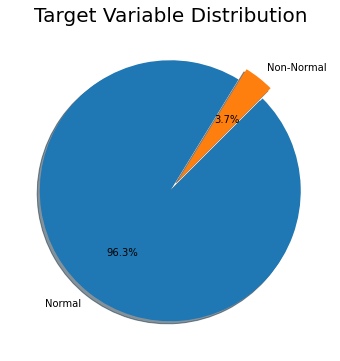

In [39]:
labels = ["Normal","Non-Normal"]
plt.figure(figsize=(6,6))
plt.title("Target Variable Distribution",fontsize=20)
plt.pie(subdata.target.value_counts(),labels = labels, 
        counterclock=False, shadow=True, autopct='%1.1f%%', radius=1,explode=[0,0.1],startangle=45)
plt.show()

In [40]:
correlations = subdata.corr()
correlations = correlations.iloc[:36, :36] 
cut_off = 0.90
high_corrs = correlations[correlations.abs() > cut_off][correlations.abs() != 1].unstack().dropna().to_dict()
high_corrs = pd.Series(high_corrs, index = high_corrs.keys())
high_corrs = high_corrs.reset_index()
high_corrs = pd.DataFrame(high_corrs)
high_corrs.columns = ['Attributes1', 'Attributes2', 'Correlations']
high_corrs['Correlations'] = high_corrs['Correlations'].drop_duplicates(keep = 'first')
high_corrs.dropna().sort_values(by = 'Correlations', ascending = False)

,Attributes1,Attributes2,Correlations
24,Col14,Col15,0.988107
0,Col1,Col5,0.986985
9,Col4,Col6,0.975232
5,Col2,Col4,0.973379
25,Col14,Col27,0.968434
39,Col27,Col28,0.967752
6,Col2,Col6,0.964767
33,Col25,Col26,0.961397
30,Col15,Col27,0.957558
19,Col12,Col13,0.955219


In [41]:
df1 = subdata.copy()
df1.drop(columns=["Col15","Col5","Col4","Col27","Col6","Col26","Col27","Col13","Col14","Col21","Col25","Col28"],axis=1,inplace=True)

correlations = df1.corr()
correlations = correlations.iloc[:36, :36] 
cut_off = 0.90
high_corrs = correlations[correlations.abs() > cut_off][correlations.abs() != 1].unstack().dropna().to_dict()
high_corrs = pd.Series(high_corrs, index = high_corrs.keys())
high_corrs = high_corrs.reset_index()
high_corrs = pd.DataFrame(high_corrs)
high_corrs.columns = ['Attributes1', 'Attributes2', 'Correlations']
high_corrs['Correlations'] = high_corrs['Correlations'].drop_duplicates(keep = 'first')
high_corrs.dropna().sort_values(by = 'Correlations', ascending = False)

,Attributes1,Attributes2,Correlations
0,Col2,target,0.952947


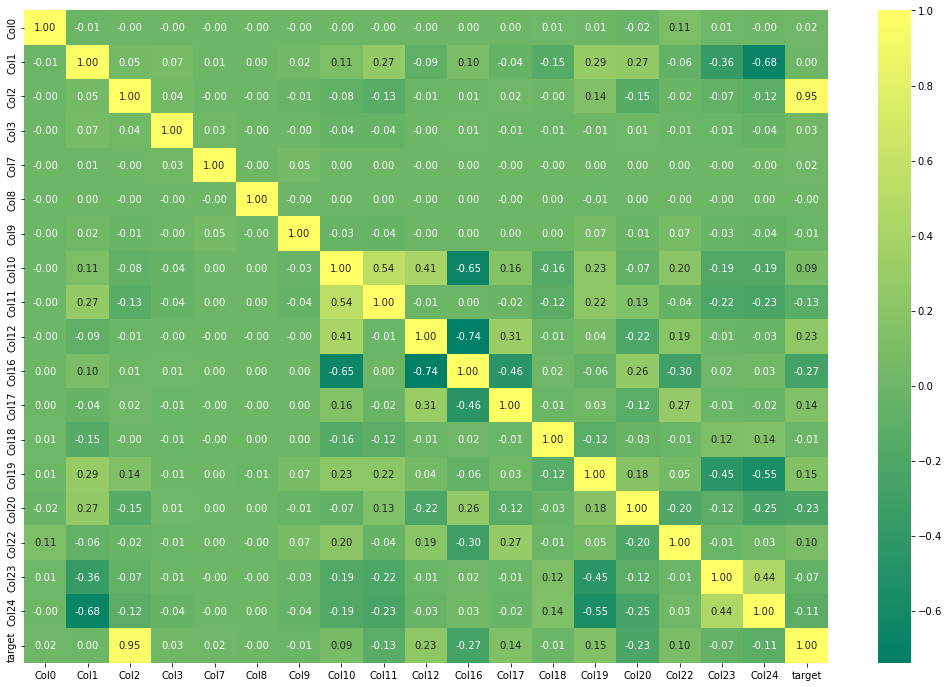

In [42]:
plt.figure(figsize=(18,12))
sns.heatmap(df1.corr(),annot=True,cmap='summer',fmt='.2f');

In [43]:
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
pd.options.display.max_columns = 100
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score,make_scorer,
                             precision_recall_curve, auc, f1_score, fbeta_score, plot_confusion_matrix,roc_curve)

In [44]:
def print_results(headline, true_value, pred):
    scores=[]
    CM = confusion_matrix(true_value, pred)
    scores.append(headline)
    scores.append(accuracy_score(true_value, pred))      #accuracy
    scores.append(int(CM[1,1]))                          #TP
    scores.append(int(CM[0,1]))                          #FP
    scores.append(int(CM[0][0]))                         #TN
    scores.append(int(CM[1][0]))                         #FN
    scores.append(precision_score(true_value, pred))     #precision
    scores.append(recall_score(true_value, pred))        #recall
    scores.append(roc_auc_score(true_value, pred))      #roc_auc
    p, r, _ = precision_recall_curve(true_value, pred) 
    scores.append(auc(r,p))                              #pr_auc
    scores.append(f1_score(true_value, pred))            #f1-score
    scores.append(fbeta_score(true_value, pred, beta=2)) #f2-score
    return scores

score_names = ['method','accuracy','TP','FP','TN','FN','precision','recall','roc_auc','pr_auc','f1', 'f2']
dfAcc = pd.DataFrame(data=np.zeros(shape=(0,12)), columns = score_names)

# Isolation Forest

In [45]:
X = df1.drop("target",axis=1)
y = df1.target

In [46]:
# Variable seperation:
nums = []
cats = []
target = []
for i in df1.columns:
        if i == "target":
            target.append(i)
        elif df1[i].dtype == "O":
            cats.append(i)
        else:
            nums.append(i)
print("Target     :", target)
print("------------")
print("Numerical  :", nums)
print("------------")
print("Categorical:", cats)

Target     : ['target']
------------
Numerical  : ['Col0', 'Col1', 'Col2', 'Col3', 'Col7', 'Col8', 'Col9', 'Col10', 'Col11', 'Col12', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20', 'Col22', 'Col23', 'Col24']
------------
Categorical: []


In [47]:
seed = 42

In [48]:
num_transformer = Pipeline(steps=[('scale',  StandardScaler())])
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('categorical', cat_transformer, cats),
                                               ('numerical', num_transformer, nums)],
                                               remainder = 'passthrough') 

pipeline = Pipeline([('preprocessor' , preprocessor),
                     ('model' , IsolationForest(max_samples=len(X), contamination=outlier_fraction,random_state=42))])

In [49]:
isolation_forest = pipeline.fit(X)

In [50]:
y_pred = isolation_forest.predict(X)

In [51]:
y_pred2 = pd.DataFrame(y_pred)
y_pred2[0].unique()

array([ 1, -1])

In [52]:
y_pred = isolation_forest.predict(X)
scores_pred = isolation_forest.decision_function(X)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != y).sum()
print(n_errors)
print(accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

3192
0.9503522934067472
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     61886
           1       0.34      0.34      0.34      2407

    accuracy                           0.95     64293
   macro avg       0.66      0.66      0.66     64293
weighted avg       0.95      0.95      0.95     64293



In [53]:
scores = print_results('IsolationForest', y, y_pred)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)
dfAcc[['TP','FP', 'TN', 'FN']] = dfAcc[['TP','FP', 'TN', 'FN']].astype(int)
dfAcc.style.hide(axis='index')

method,accuracy,TP,FP,TN,FN,precision,recall,roc_auc,pr_auc,f1,f2
IsolationForest,0.950352,811,1596,60290,1596,0.336934,0.336934,0.655572,0.349346,0.336934,0.336934


# Local Outlier Factor

In [54]:
num_transformer = Pipeline(steps=[('scale',  StandardScaler())])
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('categorical', cat_transformer, cats),
                                               ('numerical', num_transformer, nums)],
                                               remainder = 'passthrough') 

pipeline = Pipeline([('preprocessor' , preprocessor),
                     ('model' , LocalOutlierFactor(n_neighbors=20, contamination=outlier_fraction))])

In [55]:
lof = pipeline.fit(X)
y_pred = lof.fit_predict(X)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != y).sum()
print(n_errors)
print(accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

4392
0.9316877420559003
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     61886
           1       0.09      0.09      0.09      2407

    accuracy                           0.93     64293
   macro avg       0.53      0.53      0.53     64293
weighted avg       0.93      0.93      0.93     64293



In [56]:
scores = print_results('Local Outlier Factor', y, y_pred)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)
dfAcc[['TP','FP', 'TN', 'FN']] = dfAcc[['TP','FP', 'TN', 'FN']].astype(int)
dfAcc.style.hide(axis='index')

method,accuracy,TP,FP,TN,FN,precision,recall,roc_auc,pr_auc,f1,f2
IsolationForest,0.950352,811,1596,60290,1596,0.336934,0.336934,0.655572,0.349346,0.336934,0.336934
Local Outlier Factor,0.931688,211,2196,59690,2196,0.087661,0.087661,0.526088,0.104739,0.087661,0.087661


# K-Means

In [57]:
from sklearn.cluster import KMeans

In [58]:
num_transformer = Pipeline(steps=[('scale',  StandardScaler())])
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('categorical', cat_transformer, cats),
                                               ('numerical', num_transformer, nums)],
                                               remainder = 'passthrough') 

pipeline = Pipeline([('preprocessor' , preprocessor),
                     ('model' , KMeans(n_clusters=2,random_state=42))])

In [59]:
kmodel = pipeline.fit(X)

In [60]:
y_pred = kmodel.predict(X)

In [61]:
n_errors = (y_pred != y).sum()
print(n_errors)
print(accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

8875
0.8619600889676948
              precision    recall  f1-score   support

           0       0.96      0.89      0.93     61886
           1       0.00      0.01      0.01      2407

    accuracy                           0.86     64293
   macro avg       0.48      0.45      0.47     64293
weighted avg       0.92      0.86      0.89     64293



In [62]:
scores = print_results('K-Means', y, y_pred)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)
dfAcc[['TP','FP', 'TN', 'FN']] = dfAcc[['TP','FP', 'TN', 'FN']].astype(int)
dfAcc.style.hide(axis='index')

method,accuracy,TP,FP,TN,FN,precision,recall,roc_auc,pr_auc,f1,f2
IsolationForest,0.950352,811,1596,60290,1596,0.336934,0.336934,0.655572,0.349346,0.336934,0.336934
Local Outlier Factor,0.931688,211,2196,59690,2196,0.087661,0.087661,0.526088,0.104739,0.087661,0.087661
K-Means,0.861960,31,6499,55387,2376,0.004747,0.012879,0.453932,0.027291,0.006937,0.009593


# GaussianMixture

In [63]:
from sklearn.mixture import GaussianMixture

num_transformer = Pipeline(steps=[('scale',  StandardScaler())])
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('categorical', cat_transformer, cats),
                                               ('numerical', num_transformer, nums)],
                                               remainder = 'passthrough') 

pipeline = Pipeline([('preprocessor' , preprocessor),
                     ('model' , GaussianMixture(n_components=2, random_state=42))])

In [64]:
gmm = pipeline.fit(X)

In [65]:
y_pred = gmm.fit_predict(X)

In [66]:
n_errors = (y_pred != y).sum()
print(n_errors)
print(accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

1306
0.9796867466131616
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     61886
           1       0.65      1.00      0.79      2407

    accuracy                           0.98     64293
   macro avg       0.82      0.99      0.89     64293
weighted avg       0.99      0.98      0.98     64293



In [67]:
scores = print_results('Gaussian', y, y_pred)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)
dfAcc[['TP','FP', 'TN', 'FN']] = dfAcc[['TP','FP', 'TN', 'FN']].astype(int)
dfAcc.style.hide(axis='index')

method,accuracy,TP,FP,TN,FN,precision,recall,roc_auc,pr_auc,f1,f2
IsolationForest,0.950352,811,1596,60290,1596,0.336934,0.336934,0.655572,0.349346,0.336934,0.336934
Local Outlier Factor,0.931688,211,2196,59690,2196,0.087661,0.087661,0.526088,0.104739,0.087661,0.087661
K-Means,0.861960,31,6499,55387,2376,0.004747,0.012879,0.453932,0.027291,0.006937,0.009593
Gaussian,0.979687,2406,1305,60581,1,0.648343,0.999585,0.989249,0.823971,0.786532,0.901867


# AutoEncoder

In [68]:
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [69]:
num_transformer = Pipeline(steps=[('scale',  StandardScaler())])
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('categorical', cat_transformer, cats),
                                               ('numerical', num_transformer, nums)],
                                               remainder = 'passthrough') 

In [70]:
x_scaled = preprocessor.fit_transform(X.copy())

In [71]:
class AutoEncoder(Model):
    def __init__(self, output_units, code_size=8):
        super().__init__()
        self.encoder = Sequential([
                                      Dense(64, activation='relu'),
                                      Dropout(0.1),
                                      Dense(32, activation='relu'),
                                      Dropout(0.1),
                                      Dense(16, activation='relu'),
                                      Dropout(0.1),
                                      Dense(code_size, activation='relu')
                                    ])
        self.decoder = Sequential([
                                      Dense(16, activation='relu'),
                                      Dropout(0.1),
                                      Dense(32, activation='relu'),
                                      Dropout(0.1),
                                      Dense(64, activation='relu'),
                                      Dropout(0.1),
                                      Dense(output_units, activation='sigmoid')
                                    ])
  
    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

In [72]:
model = AutoEncoder(output_units=x_scaled.shape[1])
# configurations of model
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model.fit(
    x_scaled,
    x_scaled,
    epochs=20,
    batch_size=512)

Epoch 1/20
126/126 [==============================] - 1s 3ms/step - loss: 0.0837 - mse: 1.0568
Epoch 2/20
126/126 [==============================] - 0s 3ms/step - loss: 0.0403 - mse: 0.9117
Epoch 3/20
126/126 [==============================] - 0s 3ms/step - loss: 0.0328 - mse: 0.8807
Epoch 4/20
126/126 [==============================] - 0s 3ms/step - loss: 0.0303 - mse: 0.8692
Epoch 5/20
126/126 [==============================] - 0s 3ms/step - loss: 0.0287 - mse: 0.8629
Epoch 6/20
126/126 [==============================] - 0s 3ms/step - loss: 0.0277 - mse: 0.8590
Epoch 7/20
126/126 [==============================] - 0s 3ms/step - loss: 0.0269 - mse: 0.8568
Epoch 8/20
126/126 [==============================] - 0s 3ms/step - loss: 0.0264 - mse: 0.8549
Epoch 9/20
126/126 [==============================] - 0s 3ms/step - loss: 0.0259 - mse: 0.8528
Epoch 10/20
126/126 [==============================] - 0s 3ms/step - loss: 0.0255 - mse: 0.8513
Epoch 11/20
126/126 [============================

In [73]:
predictions = model.predict(x_scaled)

2010/2010 [==============================] - 1s 538us/step


In [74]:
predictions

array([[4.8867421e-04, 3.1898537e-01, 2.5624308e-06, ..., 2.0698259e-04,
        5.4390174e-03, 2.7581422e-02],
       [5.3021606e-05, 3.0155319e-01, 1.3791924e-09, ..., 5.9470889e-04,
        2.8614036e-04, 2.0439949e-02],
       [4.5349927e-05, 2.9999548e-01, 9.2716185e-10, ..., 6.0548045e-04,
        2.2547696e-04, 1.8775906e-02],
       ...,
       [8.7924633e-04, 3.1632590e-01, 1.7145134e-06, ..., 5.0212687e-04,
        6.6615306e-02, 2.7534455e-01],
       [2.8808138e-04, 2.9188868e-01, 9.1245241e-08, ..., 9.3751249e-04,
        3.1235196e-02, 4.3785009e-01],
       [1.0718591e-04, 3.1950179e-01, 9.6584063e-06, ..., 1.4282834e-05,
        4.8628318e-01, 1.4300823e-01]], dtype=float32)

In [75]:
import tensorflow as tf

In [76]:
reconstructions = model.predict(x_scaled)
reconstruction_errors = tf.keras.losses.msle(reconstructions, x_scaled)
threshold = np.mean(reconstruction_errors.numpy()) + np.std(reconstruction_errors.numpy())

2010/2010 [==============================] - 1s 545us/step


In [77]:
threshold

0.09117412447838627

In [78]:
predictions = model.predict(x_scaled)
errors = tf.keras.losses.msle(predictions, x_scaled)
anomaly_mask = pd.Series(errors) > threshold
preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
preds

2010/2010 [==============================] - 1s 634us/step


0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
64288    1.0
64289    1.0
64290    0.0
64291    1.0
64292    1.0
Length: 64293, dtype: float64

In [79]:
preds[preds == 1] = 2
preds[preds == 0] = 3

preds[preds == 3] = 1
preds[preds == 2] = 0

In [80]:
scores = print_results('AutpEncoder', y, preds)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)
dfAcc[['TP','FP', 'TN', 'FN']] = dfAcc[['TP','FP', 'TN', 'FN']].astype(int)
dfAcc.style.hide(axis='index')

method,accuracy,TP,FP,TN,FN,precision,recall,roc_auc,pr_auc,f1,f2
IsolationForest,0.950352,811,1596,60290,1596,0.336934,0.336934,0.655572,0.349346,0.336934,0.336934
Local Outlier Factor,0.931688,211,2196,59690,2196,0.087661,0.087661,0.526088,0.104739,0.087661,0.087661
K-Means,0.861960,31,6499,55387,2376,0.004747,0.012879,0.453932,0.027291,0.006937,0.009593
Gaussian,0.979687,2406,1305,60581,1,0.648343,0.999585,0.989249,0.823971,0.786532,0.901867
AutpEncoder,0.940071,434,1880,60006,1973,0.187554,0.180307,0.574964,0.199275,0.183859,0.181712


# PCA

In [81]:
from pca import pca

In [82]:
model = pca(alpha=0.05, detect_outliers=['ht2', 'spe'])
results = model.fit_transform(x_scaled)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [18] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [15] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [18] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[15]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [83]:
preds1 = results["outliers"]

In [84]:
preds1

,y_proba,p_raw,y_score,y_bool,y_bool_spe,y_score_spe
1.0,0.477118,0.041802,44.626396,False,False,1.766045
1.0,0.731757,0.075676,41.715990,False,False,1.570358
1.0,1.000000,0.128584,38.873688,False,False,1.433707
1.0,1.000000,0.194042,36.439403,False,False,1.345702
1.0,1.000000,0.288383,33.812693,False,False,1.223918
...,...,...,...,...,...,...
1.0,1.000000,0.999943,8.788419,False,False,0.690627
1.0,1.000000,0.999937,8.866509,False,False,0.891439
1.0,1.000000,0.996840,13.096011,False,False,1.175622
1.0,1.000000,0.999999,6.002807,False,False,0.539976


In [85]:
preds1["preds-HT2"] = np.where(preds1.y_bool == True,1,0)

In [86]:
predsht = preds1["preds-HT2"]

In [87]:
scores = print_results('PCA-Alpha 0.05', y, predsht)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)
dfAcc[['TP','FP', 'TN', 'FN']] = dfAcc[['TP','FP', 'TN', 'FN']].astype(int)
dfAcc.style.hide(axis='index')

method,accuracy,TP,FP,TN,FN,precision,recall,roc_auc,pr_auc,f1,f2
IsolationForest,0.950352,811,1596,60290,1596,0.336934,0.336934,0.655572,0.349346,0.336934,0.336934
Local Outlier Factor,0.931688,211,2196,59690,2196,0.087661,0.087661,0.526088,0.104739,0.087661,0.087661
K-Means,0.861960,31,6499,55387,2376,0.004747,0.012879,0.453932,0.027291,0.006937,0.009593
Gaussian,0.979687,2406,1305,60581,1,0.648343,0.999585,0.989249,0.823971,0.786532,0.901867
AutpEncoder,0.940071,434,1880,60006,1973,0.187554,0.180307,0.574964,0.199275,0.183859,0.181712
PCA-Alpha 0.05,0.942358,541,1840,60046,1866,0.227215,0.224761,0.597515,0.240500,0.225982,0.225248


In [88]:
preds1["predsSPE"] = np.where(preds1.y_bool_spe == True,1,0)
preds_spe = preds1.predsSPE

scores = print_results('PCA-SPE-Alpha 0.05', y, preds_spe)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)
dfAcc[['TP','FP', 'TN', 'FN']] = dfAcc[['TP','FP', 'TN', 'FN']].astype(int)
dfAcc.style.hide(axis='index')

method,accuracy,TP,FP,TN,FN,precision,recall,roc_auc,pr_auc,f1,f2
IsolationForest,0.950352,811,1596,60290,1596,0.336934,0.336934,0.655572,0.349346,0.336934,0.336934
Local Outlier Factor,0.931688,211,2196,59690,2196,0.087661,0.087661,0.526088,0.104739,0.087661,0.087661
K-Means,0.861960,31,6499,55387,2376,0.004747,0.012879,0.453932,0.027291,0.006937,0.009593
Gaussian,0.979687,2406,1305,60581,1,0.648343,0.999585,0.989249,0.823971,0.786532,0.901867
AutpEncoder,0.940071,434,1880,60006,1973,0.187554,0.180307,0.574964,0.199275,0.183859,0.181712
PCA-Alpha 0.05,0.942358,541,1840,60046,1866,0.227215,0.224761,0.597515,0.240500,0.225982,0.225248
PCA-SPE-Alpha 0.05,0.943649,210,1426,60460,2197,0.128362,0.087246,0.532102,0.124890,0.103883,0.093217


# 6-SIGMA

In [89]:
x_scaled = pd.DataFrame(x_scaled)
x_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.007791,0.311218,-0.193740,0.062872,-0.016735,-0.005578,-0.071168,-0.091081,-0.317558,-0.077460,0.054361,-0.037552,-0.511695,-1.146187,-5.318697,-0.079224,0.216896,-0.607398
1,-0.007791,0.311218,-0.187838,-0.198546,-0.016735,-0.005578,-0.071168,-0.091081,-0.317558,-0.077460,0.054361,-0.037552,-0.511695,-1.051991,-5.091244,-0.079224,-0.117665,-0.607398
2,-0.007791,0.311218,-0.188245,-0.153730,-0.016735,-0.005578,-0.071168,-0.091081,-0.317558,-0.077460,0.054361,-0.037552,-0.511695,-0.957794,-4.863791,-0.079224,-0.229185,-0.607398
3,-0.007791,0.311218,-0.189873,-0.153730,-0.016735,-0.005578,-0.071168,-0.242371,-0.489580,-0.077460,0.054361,-0.037552,-0.511695,-0.863598,-4.636338,-0.079224,-0.229185,-0.607398
4,-0.007791,0.311218,-0.190076,-0.117129,-0.016735,-0.005578,-0.071168,-0.242371,-0.489580,-0.077460,0.054361,-0.037552,-0.511695,-0.769402,-4.408885,-0.079224,-0.284945,-0.607398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64288,-0.007791,0.311218,-0.180612,-0.125081,-0.016735,-0.005578,-0.071168,-0.393661,-0.575590,-0.077460,0.054361,-0.037552,1.311051,-0.420875,0.276646,-0.079224,-0.340706,0.381016
64289,-0.007791,0.311218,-0.183462,-0.103753,-0.016735,-0.005578,-0.071168,-0.242371,-0.489580,-0.077460,0.054361,-0.037552,-0.511695,-1.174446,0.276646,-0.079224,0.551457,0.381016
64290,-0.007791,0.311218,-0.191501,-0.160945,-0.016735,-0.005578,-0.071168,-0.242371,0.542548,2.881616,0.054361,-0.037552,0.262972,-1.080250,0.276646,-0.079224,-0.061905,0.381016
64291,-0.007791,0.311218,-0.182546,-0.160945,-0.016735,-0.005578,-0.071168,-0.242371,0.026484,-0.077460,0.054361,-0.037552,0.262972,-0.986053,0.276646,-0.079224,-0.173425,0.381016


In [90]:
x_scaled.columns = ["Col0","Col1","Col2","Col3","Col4","Col5","Col6","Col7","Col8","Col9","Col10","Col11","Col12","Col13",
                 "Col14","Col15","Col16","Col17"]

In [91]:
for i in x_scaled.columns:
    mean = x_scaled[i].mean()
    std = x_scaled[i].std()

    anomalies = np.where(((x_scaled[i] > (mean + (6*std)))|(x_scaled[i] < (mean - (6*std)))), 1, 0)
    df_name = f"df1_{i}"
    df1 = pd.DataFrame(anomalies)
    exec(f"{df_name} = df1")

In [92]:
total = pd.concat((df1_Col0, df1_Col1, df1_Col2, df1_Col3,df1_Col4,df1_Col5,df1_Col6,df1_Col7,df1_Col8,df1_Col9,df1_Col10,df1_Col11,
                df1_Col12,df1_Col13,df1_Col14,df1_Col15,df1_Col16,df1_Col17), axis=1)

In [93]:
total

,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64288,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64289,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64290,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64291,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [94]:
total.columns = ["Col0","Col1","Col2","Col3","Col4","Col5","Col6","Col7","Col8","Col9","Col10","Col11","Col12","Col13",
               "Col14","Col15","Col16","Col17"]

In [95]:
total['sum']= total.iloc[:,:].sum(axis=1)
total

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17,sum
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64288,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64289,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64290,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64291,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
total["sum"].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [97]:
total["PredsSigma"] = np.where(total["sum"] > 0,1,0)

In [98]:
preds = total.PredsSigma

scores = print_results('Sigma-6', y, preds)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)
dfAcc[['TP','FP', 'TN', 'FN']] = dfAcc[['TP','FP', 'TN', 'FN']].astype(int)
dfAcc.style.hide(axis='index')

method,accuracy,TP,FP,TN,FN,precision,recall,roc_auc,pr_auc,f1,f2
IsolationForest,0.950352,811,1596,60290,1596,0.336934,0.336934,0.655572,0.349346,0.336934,0.336934
Local Outlier Factor,0.931688,211,2196,59690,2196,0.087661,0.087661,0.526088,0.104739,0.087661,0.087661
K-Means,0.861960,31,6499,55387,2376,0.004747,0.012879,0.453932,0.027291,0.006937,0.009593
Gaussian,0.979687,2406,1305,60581,1,0.648343,0.999585,0.989249,0.823971,0.786532,0.901867
AutpEncoder,0.940071,434,1880,60006,1973,0.187554,0.180307,0.574964,0.199275,0.183859,0.181712
PCA-Alpha 0.05,0.942358,541,1840,60046,1866,0.227215,0.224761,0.597515,0.240500,0.225982,0.225248
PCA-SPE-Alpha 0.05,0.943649,210,1426,60460,2197,0.128362,0.087246,0.532102,0.124890,0.103883,0.093217
Sigma-6,0.955501,222,676,61210,2185,0.247216,0.092231,0.540654,0.186716,0.134342,0.105453


In [99]:
for i in x_scaled.columns:
    mean = x_scaled[i].mean()
    std = x_scaled[i].std()

    anomalies = np.where(((x_scaled[i] > (mean + (3*std)))|(x_scaled[i] < (mean - (3*std)))), 1, 0)
    df_name = f"df1_{i}"
    df1 = pd.DataFrame(anomalies)
    exec(f"{df_name} = df1")

In [100]:
total = pd.concat((df1_Col0, df1_Col1, df1_Col2, df1_Col3,df1_Col4,df1_Col5,df1_Col6,df1_Col7,df1_Col8,df1_Col9,df1_Col10,df1_Col11,
                df1_Col12,df1_Col13,df1_Col14,df1_Col15,df1_Col16,df1_Col17), axis=1)

In [101]:
total.columns = ["Col0","Col1","Col2","Col3","Col4","Col5","Col6","Col7","Col8","Col9","Col10","Col11","Col12","Col13",
               "Col14","Col15","Col16","Col17"]
total['sum']= total.iloc[:,:].sum(axis=1)
total["PredsSigma"] = np.where(total["sum"] > 0,1,0)
preds = total.PredsSigma

scores = print_results('Sigma-3', y, preds)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)
dfAcc[['TP','FP', 'TN', 'FN']] = dfAcc[['TP','FP', 'TN', 'FN']].astype(int)
dfAcc.style.hide(axis='index')

method,accuracy,TP,FP,TN,FN,precision,recall,roc_auc,pr_auc,f1,f2
IsolationForest,0.950352,811,1596,60290,1596,0.336934,0.336934,0.655572,0.349346,0.336934,0.336934
Local Outlier Factor,0.931688,211,2196,59690,2196,0.087661,0.087661,0.526088,0.104739,0.087661,0.087661
K-Means,0.861960,31,6499,55387,2376,0.004747,0.012879,0.453932,0.027291,0.006937,0.009593
Gaussian,0.979687,2406,1305,60581,1,0.648343,0.999585,0.989249,0.823971,0.786532,0.901867
AutpEncoder,0.940071,434,1880,60006,1973,0.187554,0.180307,0.574964,0.199275,0.183859,0.181712
PCA-Alpha 0.05,0.942358,541,1840,60046,1866,0.227215,0.224761,0.597515,0.240500,0.225982,0.225248
PCA-SPE-Alpha 0.05,0.943649,210,1426,60460,2197,0.128362,0.087246,0.532102,0.124890,0.103883,0.093217
Sigma-6,0.955501,222,676,61210,2185,0.247216,0.092231,0.540654,0.186716,0.134342,0.105453
Sigma-3,0.842953,2400,10090,51796,7,0.192154,0.997092,0.917025,0.594677,0.322213,0.542545


In [102]:
dfAcc.method.tolist()

['IsolationForest',
 'Local Outlier Factor',
 'K-Means',
 'Gaussian',
 'AutpEncoder',
 'PCA-Alpha 0.05',
 'PCA-SPE-Alpha 0.05',
 'Sigma-6',
 'Sigma-3']

                                                        ML Algorithms Comparison                                                        
 


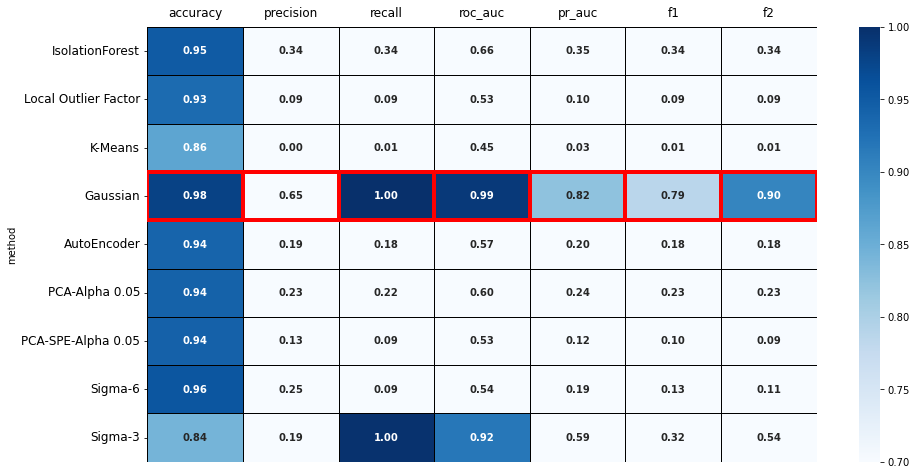

In [103]:
from matplotlib.patches import Rectangle

print('\033[1mML Algorithms Comparison'.center(140))
print(" ")
dfhm = dfAcc[["method","accuracy","precision","recall","roc_auc","pr_auc","f1","f2"]]
dfhm.index = dfhm.method
dfhm.drop("method",axis=1,inplace=True)

plt.figure(figsize=[15,8])
plt.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
chart = sns.heatmap(dfhm, linecolor = "black",
                    yticklabels=['IsolationForest','Local Outlier Factor','K-Means','Gaussian','AutoEncoder',
                                 'PCA-Alpha 0.05','PCA-SPE-Alpha 0.05','Sigma-6','Sigma-3'],
                    annot=True, annot_kws={"weight": "bold"},vmin=0.7, vmax=1, cmap='Blues',square=False, 
                    fmt='.2f',linewidths=1)
chart.set_yticklabels(chart.get_yticklabels(), rotation = 0, fontsize = 12)

column_max = dfhm.idxmax(axis=0)

for col, variable in enumerate(dfhm.columns):
    position = dfhm.index.get_loc(column_max[variable])
    chart.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=4))
plt.show()

<div class="alert alert-block alert-info">
<b>Raw Data Examination:</b> 
    <ul>
  <li>There are 64,293 observations</li>
  <li>There are 41 variables and 1 target</li>
  <li>Anomaly ratio is 3.74%</li>
  <li>Variables with only one value are removed, 32 columns remain from 42 columns.</li>
  <li>Our variables were numeric except for one. After transforming that categorical variable with the LabelEncoder, we continued on with all our variables numerically.
</li>
  <li>12 columns were more than 90% correlated with variables other than the target. We removed these 12 variables from our data.</li>

</ul>

<div class="alert alert-block alert-info">
<b>Summary:</b> 
<ol>
  <li>Gaussian Mixture gave the best result by far from the ML algorithms we used for Anomaly detection.</li>
  <li>This method produced the best result in all scoring points.</li>
</ol>